# Plotting Collaborator Characteristics by Seniority

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

In [2]:
data = {
    'Junior': {'retracted': [20, 30, 40], 'non-retracted': [30, 40, 50]},
    'Senior': {'retracted': [20, 30, 40], 'non-retracted': [30, 40, 50]}
}

df = pd.DataFrame(data)
df

,Junior,Senior
retracted,"[20, 30, 40]","[20, 30, 40]"
non-retracted,"[30, 40, 50]","[30, 40, 50]"


In [27]:
def create_collaborator_char_plot(categories, retracted_data, non_retracted_data, p_data, color_dict, marker_dict, 
                                  xticks, foutname, create_legend=False, 
                                 letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']):
    # Generate some random data for demonstration

    #retracted_data = np.random.rand(3,3)  # Three categories with three pairs of data points each
    #non_retracted_data = np.random.rand(3, 3)

    # Set the significance threshold for connecting lines
    significance_threshold = 0.05

    # Create the figure with subplots
    fig, axs = plt.subplots(3, 3, figsize=(8, 5.5), sharey='row')
    fig.subplots_adjust(hspace=0.5)

    counter = 0
    
    colors = [color_dict.get(categories[0]),
             color_dict.get(categories[1]),
             color_dict.get(categories[2]),]
    
    # Iterate over each subplot
    for i, ax in enumerate(axs.flat):
        category_index = i % 3  # Determine the category (0, 1, or 2)
        retracted_values = retracted_data[counter]
        non_retracted_values = non_retracted_data[counter]
        pval_values = p_data[counter]
    
        # Connect the dots with solid or dotted lines based on significance
        for j in range(len(retracted_values)):
            line_style = '-' if pval_values[j] < significance_threshold else ':'
            ax.plot([retracted_values[j], non_retracted_values[j]], [j + 1, j + 1], 'k', linestyle=line_style)
            
        # This is the code to go with.
        for x, y, color in zip(retracted_values, [1,2,3], colors):
            ax.plot(x, y, color=color, label='Retracted', marker='o')

        for x, y, color in zip(non_retracted_values, [1,2,3], colors):
            ax.plot(x, y, color=color, label='Non-retracted', marker='s')


        
        ax.set_xticks(xticks[counter])
        ax.set_xticklabels(xticks[counter])
        
        ax.set_yticks([1, 2, 3])
        ax.set_yticklabels(categories)
        ax.set_ylim(-0.5, 4)
        ax.spines[['right', 'top']].set_visible(False)
        
        ax.invert_yaxis()
        
        ax.annotate(letters[i], xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14, fontweight='bold')
        
        counter += 1
        
        # Labeling the x and y axis
        if(counter == 1):
            ax.set_ylabel('Collaborators\nRetained', labelpad=25, fontsize=12)
            ax.set_xlabel("Academic Age", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 2):
            ax.set_xlabel("Number of Papers", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
            
        elif(counter == 3):
            ax.set_xlabel("Number of Citations", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 4):
            ax.set_ylabel('Collaborators\nGained', labelpad=25, fontsize=12)
            
        elif(counter == 7):
            ax.set_ylabel('Difference-in-\nDifference', labelpad=25, fontsize=12)

    #     ax.legend(False)

    # Set the overall title for the figure
    #fig.suptitle('Comparison of Retracted and Non-retracted Scientists', fontsize=16)
    
    if(create_legend):
        # Create a custom legend
        # Let us add items to the legend 
        legend_elements = []
        for key in color_dict.keys():
            colori = color_dict.get(key)
            markeri = marker_dict.get(key)

#             elementi = plt.Line2D([0], [0], marker=markeri, color='w', markerfacecolor=colori, 
#                                   markersize=8, label=key)
    
            elementi = None
        
            if key == "Retracted":
            # Create an empty circle as a marker
                elementi = plt.Line2D([0], [0], marker='o', color=colori, markerfacecolor='none', 
                                      markersize=8, label=key, linestyle='', fillstyle='none')
            elif key == "Non-retracted":
            # Create an empty square as a marker
                elementi = plt.Line2D([0], [0], marker='s', color=colori, markerfacecolor='none', 
                                  markersize=8, label=key, linestyle='', fillstyle='none')
            else:
                elementi = plt.Line2D([0], [0], color=colori, linewidth=5, label=key)

            legend_elements.append(elementi)

        #fig.legend(handles=legend_elements, loc='lower right')
        legend = fig.legend(handles=legend_elements, loc='upper center', ncol=len(legend_elements), prop={'size': 11},
                  frameon=False)
        legend.set_bbox_to_anchor((0.5, 0.98))
    
    rect = Rectangle((0, 0), 1, 0.90, transform=fig.transFigure, fill=False, edgecolor='black')

    fig.patches.append(rect)

    # Adjust the layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    #plt.tight_layout()
    
    plt.savefig(foutname, format='pdf')
    # Show the plot
    plt.show()


# Plotting Collaborator Characteristics by Reason

In [28]:
def read_dict(fname):
    import pickle
    
    with open(fname, 'rb') as f:
        loaded_dict = pickle.load(f)
        return loaded_dict

    
dict_forAge = read_dict("collaborator_chars_byAge.pkl")
dict_forReason = read_dict("collaborator_chars_byReason.pkl")

# Let us now create retracted means, and retracted pvals, and non-retracted means, and non-retracted pvals
# We will do so for both stratified by age, and stratified by reason


def create_lists_for_plots(dicto, categories=['Junior','Mid','Senior'], 
                                    scientistType='retracted',
                                    statistic="mean"):
    expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
    expFields2 = ['AcademicAge', 'MAGCumPapers', 'MAGCumCitations']
    outcomeTypes = ['Retention', 'Gain', 'DiD']
    lstOflst = []
    
    for outcomeType in outcomeTypes:
        for i in range(len(expFields)):
            field1 = expFields[i]
            field2 = expFields2[i]
            lst_i = []
            # going through senior junior and mid-career
            for category in categories:
                statistic_key = ''
                if outcomeType in ['Retention', 'Gain']:
                    statistic_key = 'Collab' + field2 + "AtCollaboration_" + scientistType + "_" + statistic

                elif outcomeType in ['DiD']:
                    statistic_key = 'Diff' + field2 + "AtRetraction_" + scientistType + "_" + statistic

                val = dicto.get(outcomeType).get(field1).get(category).get(statistic_key)
                
                print(field1, field2, outcomeType, scientistType, category, val)
                
                lst_i.append(val)
            lstOflst.append(lst_i)

    return lstOflst



In [29]:
def create_pval_lists_for_plots(dicto, categories=['Junior','Mid','Senior'], 
                                    statistic="pval_welch"):
    
    expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
    expFields2 = ['AcademicAge', 'MAGCumPapers', 'MAGCumCitations']
    outcomeTypes = ['Retention', 'Gain', 'DiD']
    lstOflst = []
    
    for outcomeType in outcomeTypes:
        for i in range(len(expFields)):
            field1 = expFields[i]
            field2 = expFields2[i]
            lst_i = []
            # going through senior junior and mid-career
            for category in categories:
                statistic_key = ''
                if outcomeType in ['Retention', 'Gain']:
                    statistic_key = 'Collab' + field2 + "AtCollaboration_"  + statistic

                elif outcomeType in ['DiD']:
                    statistic_key = 'Diff' + field2 + "AtRetraction_" + statistic

                val = dicto.get(outcomeType).get(field1).get(category).get(statistic_key)
                
                print(field1, field2, outcomeType, category, val)
                
                lst_i.append(val)
            lstOflst.append(lst_i)

    return lstOflst

In [30]:
retracted_means_age = create_lists_for_plots(dict_forAge, categories=['Junior','Mid','Senior'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_age = create_lists_for_plots(dict_forAge, categories=['Junior','Mid','Senior'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

Academic Age AcademicAge Retention retracted Junior 12.26
Academic Age AcademicAge Retention retracted Mid 14.69
Academic Age AcademicAge Retention retracted Senior 15.71
Number of Papers MAGCumPapers Retention retracted Junior 65.43
Number of Papers MAGCumPapers Retention retracted Mid 80.72
Number of Papers MAGCumPapers Retention retracted Senior 69.83
Number of Citations MAGCumCitations Retention retracted Junior 1295.48
Number of Citations MAGCumCitations Retention retracted Mid 1537.61
Number of Citations MAGCumCitations Retention retracted Senior 1657.42
Academic Age AcademicAge Gain retracted Junior 7.16
Academic Age AcademicAge Gain retracted Mid 8.06
Academic Age AcademicAge Gain retracted Senior 8.95
Number of Papers MAGCumPapers Gain retracted Junior 36.21
Number of Papers MAGCumPapers Gain retracted Mid 39.7
Number of Papers MAGCumPapers Gain retracted Senior 41.12
Number of Citations MAGCumCitations Gain retracted Junior 871.58
Number of Citations MAGCumCitations Gain retr

In [31]:
retracted_pvals_age = create_pval_lists_for_plots(dict_forAge, categories=['Junior','Mid','Senior'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention Junior 0.001
Academic Age AcademicAge Retention Mid 0.07
Academic Age AcademicAge Retention Senior 0.02
Number of Papers MAGCumPapers Retention Junior 0.032
Number of Papers MAGCumPapers Retention Mid 0.566
Number of Papers MAGCumPapers Retention Senior 0.306
Number of Citations MAGCumCitations Retention Junior 0.276
Number of Citations MAGCumCitations Retention Mid 0.237
Number of Citations MAGCumCitations Retention Senior 0.534
Academic Age AcademicAge Gain Junior 0.077
Academic Age AcademicAge Gain Mid 0.775
Academic Age AcademicAge Gain Senior 0.479
Number of Papers MAGCumPapers Gain Junior 0.828
Number of Papers MAGCumPapers Gain Mid 0.279
Number of Papers MAGCumPapers Gain Senior 0.013
Number of Citations MAGCumCitations Gain Junior 0.615
Number of Citations MAGCumCitations Gain Mid 0.449
Number of Citations MAGCumCitations Gain Senior 0.002
Academic Age AcademicAge DiD Junior 0.292
Academic Age AcademicAge DiD Mid 0.537
Academic Age AcademicAge

In [32]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Early-Career', 'Mid-Career', 'Senior']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_age)):
    for j in range(len(retracted_pvals_age[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_age[i][j]
        nonretracted_mean = nonretracted_means_age[i][j]
        
        retracted_pval = retracted_pvals_age[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)
        

Academic Age,Retention,Early-Career,12.26,14.01***,0.001
Academic Age,Retention,Mid-Career,14.69,15.73,0.07
Academic Age,Retention,Senior,15.71,16.79***,0.02
Academic Age,Gain,Early-Career,65.43,77.13***,0.032
Academic Age,Gain,Mid-Career,80.72,85.26,0.566
Academic Age,Gain,Senior,69.83,74.28,0.306
Academic Age,DiD,Early-Career,1295.48,1467.54,0.276
Academic Age,DiD,Mid-Career,1537.61,1809.91,0.237
Academic Age,DiD,Senior,1657.42,1507.48,0.534
Number of Papers,Retention,Early-Career,7.16,7.86,0.077
Number of Papers,Retention,Mid-Career,8.06,7.95,0.775
Number of Papers,Retention,Senior,8.95,8.72,0.479
Number of Papers,Gain,Early-Career,36.21,35.6,0.828
Number of Papers,Gain,Mid-Career,39.7,35.77,0.279
Number of Papers,Gain,Senior,41.12***,35.84,0.013
Number of Papers,DiD,Early-Career,871.58,822.8,0.615
Number of Papers,DiD,Mid-Career,886.13,788.61,0.449
Number of Papers,DiD,Senior,924.74***,702.8,0.002
Number of Citations,Retention,Early-Career,3.31,3.85,0.292
Number of Citations,Retent

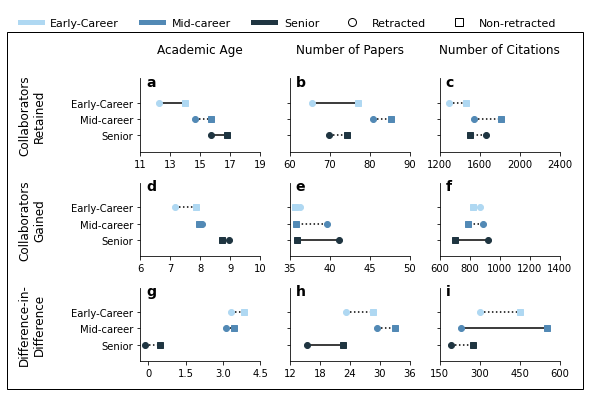

In [33]:
categories = ['Early-Career', 'Mid-career', 'Senior']

color_dict = {'Early-Career':'#AFD8F2',
             'Mid-career':'#5289B5',
             'Senior': '#1F3541',
             'Retracted': 'black',
             'Non-retracted':'black'}

marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Early-Career': 'o',
             'Senior': 'o',
              'Mid-career':'o'}

xticks = [[11,13,15,17,19],
         [60,70,80,90],
         [1200,1600,2000,2400],
         [6,7,8,9,10],
         [35,40,45,50],
         [600,800,1000,1200,1400],
         [0,1.5,3.0,4.5],
         [12,18,24,30,36],
         [150,300,450,600]]

create_collaborator_char_plot(categories, retracted_means_age, 
                              nonretracted_means_age, retracted_pvals_age, 
                              color_dict, marker_dict, xticks, 
                              foutname = "collaborator_quality_bySeniority_new.pdf",
                              create_legend=True)


In [34]:
retracted_means_age

[[12.26, 14.69, 15.71],
 [65.43, 80.72, 69.83],
 [1295.48, 1537.61, 1657.42],
 [7.16, 8.06, 8.95],
 [36.21, 39.7, 41.12],
 [871.58, 886.13, 924.74],
 [3.31, 3.11, -0.14],
 [23.28, 29.47, 15.35],
 [301.29, 230.42, 191.99]]

In [35]:
retracted_means_reason = create_lists_for_plots(dict_forReason, categories=['Misconduct','Plagiarism','Mistake'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_reason = create_lists_for_plots(dict_forReason, categories=['Misconduct','Plagiarism','Mistake'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

retracted_pvals_reason = create_pval_lists_for_plots(dict_forReason, categories=['Misconduct','Plagiarism','Mistake'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention retracted Misconduct 13.56
Academic Age AcademicAge Retention retracted Plagiarism 12.71
Academic Age AcademicAge Retention retracted Mistake 15.07
Number of Papers MAGCumPapers Retention retracted Misconduct 73.6
Number of Papers MAGCumPapers Retention retracted Plagiarism 61.95
Number of Papers MAGCumPapers Retention retracted Mistake 75.33
Number of Citations MAGCumCitations Retention retracted Misconduct 1480.05
Number of Citations MAGCumCitations Retention retracted Plagiarism 981.9
Number of Citations MAGCumCitations Retention retracted Mistake 1778.22
Academic Age AcademicAge Gain retracted Misconduct 7.98
Academic Age AcademicAge Gain retracted Plagiarism 6.68
Academic Age AcademicAge Gain retracted Mistake 8.61
Number of Papers MAGCumPapers Gain retracted Misconduct 45.01
Number of Papers MAGCumPapers Gain retracted Plagiarism 32.43
Number of Papers MAGCumPapers Gain retracted Mistake 41.39
Number of Citations MAGCumCitations Gain retracted M

In [36]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Misconduct','Plagiarism','Mistake']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_reason)):
    for j in range(len(retracted_pvals_reason[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_reason[i][j]
        nonretracted_mean = nonretracted_means_reason[i][j]
        
        retracted_pval = retracted_pvals_reason[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)

Academic Age,Retention,Misconduct,13.56,14.78***,0.046
Academic Age,Retention,Plagiarism,12.71,15.24***,0.0
Academic Age,Retention,Mistake,15.07,15.71,0.207
Academic Age,Gain,Misconduct,73.6,81.77,0.367
Academic Age,Gain,Plagiarism,61.95,69.02,0.156
Academic Age,Gain,Mistake,75.33,80.69,0.302
Academic Age,DiD,Misconduct,1480.05,1790.19,0.154
Academic Age,DiD,Plagiarism,981.9,1045.83,0.665
Academic Age,DiD,Mistake,1778.22,1824.58,0.81
Number of Papers,Retention,Misconduct,7.98,8.1,0.792
Number of Papers,Retention,Plagiarism,6.68,7.74***,0.008
Number of Papers,Retention,Mistake,8.61,8.14,0.172
Number of Papers,Gain,Misconduct,45.01***,34.42,0.012
Number of Papers,Gain,Plagiarism,32.43,33.89,0.584
Number of Papers,Gain,Mistake,41.39,37.49,0.198
Number of Papers,DiD,Misconduct,1105.93***,702.35,0.002
Number of Papers,DiD,Plagiarism,603.46,625.35,0.801
Number of Papers,DiD,Mistake,1075.94,946.34,0.262
Number of Citations,Retention,Misconduct,1.71,2.05,0.553
Number of Citations,Retention,Pla

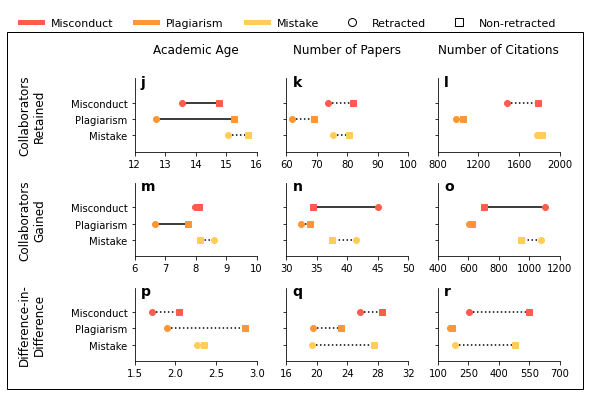

In [37]:
categories = ['Misconduct', 'Plagiarism', 'Mistake']

color_dict = {'Misconduct':'#7B2869',
             'Plagiarism':'#C85C8E',
             'Mistake': '#FFBABA',
             'Retracted': 'black',
             'Non-retracted':'black'}

color_dict = {'Misconduct':'#FF5C4D',
             'Plagiarism':'#FF9636',
             'Mistake': '#FFCD58',
             'Retracted': 'black',
             'Non-retracted':'black'}

marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Misconduct': 'o',
             'Plagiarism': 'o',
              'Mistake':'o'}

xticks = [[12,13,14,15,16],
         [60,70,80,90,100],
         [800,1200,1600,2000],
         [6,7,8,9,10],
         [30,35,40,45,50],
         [400,600,800,1000,1200],
         [1.5,2.0,2.5,3.0],
         [16,20,24,28,32],
         [100,250,400,550,700]]

create_collaborator_char_plot(categories, retracted_means_reason, 
                              nonretracted_means_reason, retracted_pvals_reason, 
                              color_dict, marker_dict, xticks, 
                              foutname = "collaborator_quality_byReason_new.pdf",
                              create_legend=True,
                             letters = ['j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r'])